In [22]:
For this project, we developed a classification model to predict whether customers of a Belgian bank-
insurer, with retail customers above 18 years old, will churn or not. The datasets utilized included information
on customers for 3 consecutive months. The approach followed involved data pre-processing (cleaning, feature
selection and engineering), model creation and model tuning

SyntaxError: invalid syntax (1148004674.py, line 1)

For this project, a classification model is developed to predict whether customers of a Belgian bank-insurer, with retail customers above 18 years old, will churn or not. The datasets utilized included information on customers for 3 consecutive months. The approach followed involved data pre-processing (cleaning, feature selection and engineering), model creation and model tuning.

# Import Libraries

In [9]:
import pandas as pd 
import numpy as np 
from pandas import MultiIndex, Int64Index
from copy import deepcopy
import time
from datetime import date
from tabulate import tabulate

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

from sklearn.utils import class_weight
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.svm import LinearSVC,SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,f1_score, ConfusionMatrixDisplay,precision_score,recall_score,f1_score,classification_report,roc_curve,plot_roc_curve,auc,precision_recall_curve,plot_precision_recall_curve,average_precision_score
from sklearn.model_selection import cross_val_score , cross_val_predict, StratifiedKFold,train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import  CalibratedClassifierCV 
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from imblearn.ensemble import BalancedRandomForestClassifier,BalancedBaggingClassifier,RUSBoostClassifier

from imblearn.under_sampling import NearMiss,RandomUnderSampler
from imblearn.over_sampling import SMOTENC
import xgboost as xgb
from xgboost import XGBClassifier


import warnings
warnings.filterwarnings("ignore")




In [10]:
train1 = pd.read_csv('train_month_3_with_target.csv')
train2 = pd.read_csv('train_month_2.csv')
train3 = pd.read_csv('train_month_1.csv')
test1 = pd.read_csv('test_month_3.csv')
test2 = pd.read_csv('test_month_2.csv')
test3 = pd.read_csv('test_month_1.csv')

copy_df = pd.read_csv('train_month_3_with_target.csv')
copy_df2= pd.read_csv('test_month_3.csv')

# Data pre-processing

## Dataset Cleaning

In [11]:
#train1.info()
train1.describe()
train1.isna().any()
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63697 entries, 0 to 63696
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   client_id                          63697 non-null  object 
 1   homebanking_active                 63697 non-null  int64  
 2   has_homebanking                    63697 non-null  int64  
 3   has_insurance_21                   63697 non-null  int64  
 4   has_insurance_23                   63697 non-null  int64  
 5   has_life_insurance_fixed_cap       63697 non-null  int64  
 6   has_life_insurance_decreasing_cap  63697 non-null  int64  
 7   has_fire_car_other_insurance       63697 non-null  int64  
 8   has_personal_loan                  63697 non-null  int64  
 9   has_mortgage_loan                  63697 non-null  int64  
 10  has_current_account                63697 non-null  int64  
 11  has_pension_saving                 63697 non-null  int

In [12]:
train1['customer_since_all'] = pd.to_datetime(train1['customer_since_all'])
train1['customer_since_bank'] = pd.to_datetime(train1['customer_since_bank'])
train1['customer_birth_date'] = pd.to_datetime(train1['customer_birth_date'])

cat_vars = []
cont_vars = []
columns = list(train1.drop(columns = ['client_id']).columns)
for i in columns:
    if (len(train1.loc[:,i].unique()) >= 20):
        cont_vars.append(i)
    else:
        cat_vars.append(i)
        
print('Continious variables are:',cont_vars)
print('------------------')
print('Categorical variables are:',cat_vars)
# Here we have our list of categorical and continious variables

Continious variables are: ['bal_insurance_21', 'bal_insurance_23', 'cap_life_insurance_fixed_cap', 'cap_life_insurance_decreasing_cap', 'prem_fire_car_other_insurance', 'bal_personal_loan', 'bal_mortgage_loan', 'bal_current_account', 'bal_pension_saving', 'bal_savings_account', 'bal_savings_account_starter', 'bal_current_account_starter', 'customer_since_all', 'customer_since_bank', 'customer_birth_date', 'customer_postal_code']
------------------
Categorical variables are: ['homebanking_active', 'has_homebanking', 'has_insurance_21', 'has_insurance_23', 'has_life_insurance_fixed_cap', 'has_life_insurance_decreasing_cap', 'has_fire_car_other_insurance', 'has_personal_loan', 'has_mortgage_loan', 'has_current_account', 'has_pension_saving', 'has_savings_account', 'has_savings_account_starter', 'has_current_account_starter', 'visits_distinct_so', 'visits_distinct_so_areas', 'customer_gender', 'customer_occupation_code', 'customer_self_employed', 'customer_education', 'customer_children', 

### Categorical features unique values - checking consistency

In [13]:
# To check we will print all unique values
for col in cat_vars:
    print(col,train1[col].unique())

homebanking_active [0 1]
has_homebanking [0 1]
has_insurance_21 [0 1]
has_insurance_23 [0 1]
has_life_insurance_fixed_cap [0 1]
has_life_insurance_decreasing_cap [0 1]
has_fire_car_other_insurance [1 0]
has_personal_loan [0 1]
has_mortgage_loan [0 1]
has_current_account [1 0]
has_pension_saving [0 1]
has_savings_account [1 0]
has_savings_account_starter [0 1]
has_current_account_starter [0 1]
visits_distinct_so [1. 2. 3. 4. 6. 5. 7.]
visits_distinct_so_areas [1. 2. 3. 5. 4. 6.]
customer_gender [1 2]
customer_occupation_code [ 9. nan  7.  8.  4.  5.  0.  6.  3.  1.  2.]
customer_self_employed [0 1]
customer_education [ 0. nan  2.  1.  4.  3.  5.  6.]
customer_children [nan 'mature' 'no' 'young' 'preschool' 'adolescent' 'grownup' 'onebaby'
 'yes']
customer_relationship [nan 'couple' 'single']
target [0 1]


In [14]:
# looks good, should transform into categorical

### Missing Data

In [15]:
missing_df = train1.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['%']=(missing_df['missing values'])/train1.shape[0]*100
missing_df = missing_df[missing_df['missing values'] >0].sort_values('%')
missing_df

,variable,missing values,%
29,customer_since_all,234,0.367364
30,customer_since_bank,249,0.390913
34,customer_occupation_code,2002,3.143005
38,customer_relationship,14899,23.390427
37,customer_children,23364,36.679906
36,customer_education,47125,73.983076


In [16]:
missing_df = train2.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['%']=(missing_df['missing values'])/train1.shape[0]*100
missing_df = missing_df[missing_df['missing values'] >0].sort_values('%')
missing_df

,variable,missing values,%
29,customer_since_all,234,0.367364
30,customer_since_bank,249,0.390913
34,customer_occupation_code,2002,3.143005
38,customer_relationship,14476,22.726345
37,customer_children,23065,36.210497
36,customer_education,47125,73.983076


In [17]:
missing_df = train3.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['%']=(missing_df['missing values'])/train1.shape[0]*100
missing_df = missing_df[missing_df['missing values'] >0].sort_values('%')
missing_df

,variable,missing values,%
29,customer_since_all,234,0.367364
30,customer_since_bank,249,0.390913
34,customer_occupation_code,2002,3.143005
38,customer_relationship,14456,22.694946
37,customer_children,23056,36.196367
36,customer_education,47125,73.983076


In [18]:
for x in ['customer_since_all','customer_since_bank','customer_occupation_code','customer_relationship',
         'customer_children','customer_education']:
    print(str(x) + ": " + str(train2.loc[train1[x].isna(),x].value_counts().sum()))
    print(str(x) + ": " + str(train3.loc[train1[x].isna(),x].value_counts().sum()))
    print("-----------------------------------------")

customer_since_all: 0
customer_since_all: 0
-----------------------------------------
customer_since_bank: 0
customer_since_bank: 0
-----------------------------------------
customer_occupation_code: 0
customer_occupation_code: 0
-----------------------------------------
customer_relationship: 1000
customer_relationship: 1015
-----------------------------------------
customer_children: 977
customer_children: 984
-----------------------------------------
customer_education: 0
customer_education: 0
-----------------------------------------


In [11]:
# Fix customer relationship and customer children for training set
train1['customer_children2'] = train2['customer_children']
train1['customer_children3'] = train3['customer_children']

train1.customer_children = np.where(train1.customer_children.isnull(), train1.customer_children2, train1.customer_children)
train1.customer_children = np.where(train1.customer_children.isnull(), train1.customer_children3, train1.customer_children)


train1['customer_relationship2'] = train2['customer_relationship']
train1['customer_relationship3'] = train3['customer_relationship']

train1.customer_relationship = np.where(train1.customer_relationship.isnull(), train1.customer_relationship2, train1.customer_relationship)
train1.customer_relationship = np.where(train1.customer_relationship.isnull(), train1.customer_relationship3, train1.customer_relationship)

train2['customer_children'] = train1['customer_children']
train3['customer_children'] = train1['customer_children']

train2['customer_relationship'] = train1['customer_relationship']
train3['customer_relationship'] = train1['customer_relationship']

train1 = train1.drop(columns = ['customer_relationship2','customer_relationship3',
                                'customer_children2','customer_children3'])

In [19]:
for x in ['customer_since_all','customer_since_bank','customer_occupation_code','customer_relationship',
         'customer_children','customer_education']:
    print(str(x) + ": " + str(test2.loc[test2[x].isna(),x].value_counts().sum()))
    print(str(x) + ": " + str(test3.loc[test2[x].isna(),x].value_counts().sum()))
    print("-----------------------------------------")

customer_since_all: 0
customer_since_all: 0
-----------------------------------------
customer_since_bank: 0
customer_since_bank: 0
-----------------------------------------
customer_occupation_code: 0
customer_occupation_code: 0
-----------------------------------------
customer_relationship: 0
customer_relationship: 16
-----------------------------------------
customer_children: 0
customer_children: 9
-----------------------------------------
customer_education: 0
customer_education: 0
-----------------------------------------


In [13]:
# Fix customer relationship and customer children for training set
test1['customer_children2'] = test2['customer_children']
test1['customer_children3'] = test3['customer_children']

test1.customer_children = np.where(test1.customer_children.isnull(), test1.customer_children2, test1.customer_children)
test1.customer_children = np.where(test1.customer_children.isnull(), test1.customer_children3, test1.customer_children)


test1['customer_relationship2'] = test2['customer_relationship']
test1['customer_relationship3'] = test3['customer_relationship']

test1.customer_relationship = np.where(test1.customer_relationship.isnull(), test1.customer_relationship2, test1.customer_relationship)
test1.customer_relationship = np.where(test1.customer_relationship.isnull(), test1.customer_relationship3, test1.customer_relationship)

test2['customer_children'] = test1['customer_children']
test3['customer_children'] = test1['customer_children']

test2['customer_relationship'] = test1['customer_relationship']
test3['customer_relationship'] = test1['customer_relationship']

test1 = test1.drop(columns = ['customer_relationship2','customer_relationship3',
                                'customer_children2','customer_children3'])

In [14]:
#Check how many churners are for the missing rows in customer_since_all & 
train1['target'].loc[(train1['customer_since_all'].isna()) & (train1['customer_since_bank'].isna())].sum()
# We will drop columns with missing customer_since_all and customer_since_bank since they are very few churners among the NaN values

12

In [20]:
df_list=[train1,train2,train3,test1,test2,test3]

In [16]:
def drop_rows(x):
    x.drop(x[x['customer_since_all'].isna()].index,inplace = True)
    x.drop(x[x['customer_since_bank'].isna()].index,inplace = True)

In [17]:
for x in df_list:
    drop_rows(x)

In [18]:
missing_df = train1.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['%']=(missing_df['missing values'])/train1.shape[0]*100
missing_df = missing_df[missing_df['missing values'] >0].sort_values('%')
missing_df

,variable,missing values,%
34,customer_occupation_code,1980,3.120666
38,customer_relationship,13832,21.800530
37,customer_children,22305,35.154772
36,customer_education,46944,73.988148


Before we do anything with any of the columns with remainder of the missing values, we will select the features.

### hide temp explore

<Axes: xlabel='customer_education', ylabel='count'>

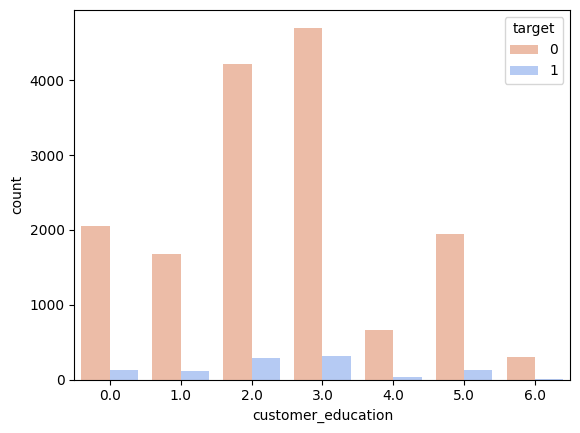

In [21]:
sns.countplot(x='customer_education',data=train1,hue='target',palette="coolwarm_r")

job_code 0 416
job_code 1 24
job_code 2 7
job_code 3 9
job_code 4 1584
job_code 5 148
job_code 6 175
job_code 7 101
job_code 8 303
job_code 9 53731


<AxesSubplot:xlabel='customer_occupation_code', ylabel='Count'>

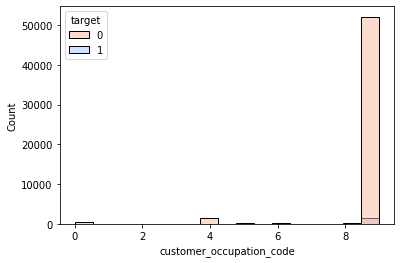

In [89]:
for x in range(0,10):
    print(f'job_code {x}', len(train1.loc[(train1['customer_occupation_code']==x)]))
    
sns.histplot(x='customer_occupation_code',data=train1,hue='target',palette="coolwarm_r")

<AxesSubplot:xlabel='customer_occupation_code', ylabel='Count'>

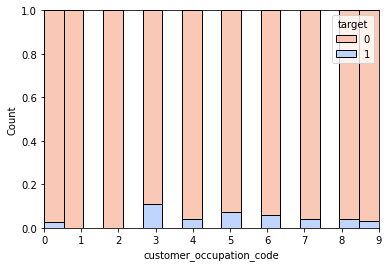

In [90]:
sns.histplot(x='customer_occupation_code',data=train1,hue='target',palette="coolwarm_r",multiple = "fill")

In [91]:


a = len(train1.loc[(train1['customer_relationship']=='couple') & (train1['target']== 0)])+len(train1.loc[(train1['customer_relationship']=='couple') & (train1['target']== 1)]) 

b = len(train1.loc[(train1['customer_relationship']=='single') & (train1['target']== 0)])+ len(train1.loc[(train1['customer_relationship']=='single') & (train1['target']== 1)]) 
table=[['Relationship','0','1'],
        [str(len(train1.loc[(train1['customer_relationship']=='couple')])) + ' Couple',round(len(train1.loc[(train1['customer_relationship']=='couple') & (train1['target']== 0)])/a,3 ),round(len(train1.loc[(train1['customer_relationship']=='couple') & (train1['target']== 1)])/a,3) ],
        [str(len(train1.loc[(train1['customer_relationship']=='single')])) + ' Single',round(len(train1.loc[(train1['customer_relationship']=='single') & (train1['target']== 0)])/b,3) ,round(len(train1.loc[(train1['customer_relationship']=='single') & (train1['target']== 1)])/b,3) ]]
print(tabulate(table, headers='firstrow'))



Relationship        0      1
--------------  -----  -----
31919 Couple    0.967  0.033
12828 Single    0.974  0.026


In [92]:
rep = {'mature':1,'no':0, 'young':1,'preschool':1,'adolescent':1,'grownup':1,'onebaby':1
 ,'yes':1}
train1['customer_children']= train1['customer_children'].replace(rep) 

In [93]:
c = len(train1.loc[(train1['customer_children']==0) & (train1['target']== 0)])+len(train1.loc[(train1['customer_children']==0) & (train1['target']== 1)]) 

d = len(train1.loc[(train1['customer_children']==1) & (train1['target']== 0)])+ len(train1.loc[(train1['customer_children']==1) & (train1['target']== 1)]) 
table=[['Children','0','1'],
        [str(len(train1.loc[(train1['customer_children']==0)])) + ' Without kids',round(len(train1.loc[(train1['customer_children']==0) & (train1['target']== 0)])/c,2 ),round(len(train1.loc[(train1['customer_children']==0) & (train1['target']== 1)])/c,2) ],
        [str(len(train1.loc[(train1['customer_children']==1)])) + ' With kids',round(len(train1.loc[(train1['customer_children']==1) & (train1['target']== 0)])/d,2) ,round(len(train1.loc[(train1['customer_children']==1) & (train1['target']== 1)])/d,2) ]]
print(tabulate(table, headers='firstrow'))

Children               0     1
------------------  ----  ----
23108 Without kids  0.98  0.02
13186 With kids     0.95  0.05


<AxesSubplot:xlabel='customer_children', ylabel='Count'>

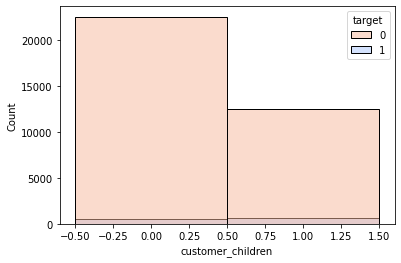

In [94]:
train1['customer_children'] = pd.Categorical(train1['customer_children'])
sns.histplot(x='customer_children',data=train1,hue='target',palette="coolwarm_r")

[(0.0, 0.06)]

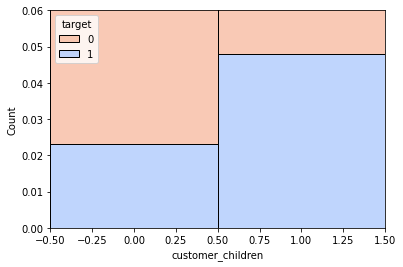

In [95]:
plot = sns.histplot(x='customer_children',data=train1,hue='target',palette="coolwarm_r",multiple = "fill")
plot.set(ylim=(0,0.06))

In [96]:
train1_test = train1.copy()
# train1_test['customer_children'].isna()
train1_test['customer_children'] = pd.to_numeric(train1_test['customer_children'])
train1_test.loc[train1_test['customer_children'].isna(),'customer_children'] = 2

In [97]:
train1_test['customer_children'].replace({0:'no children',1:'children',2:'missing'})
train1_test['customer_children'] = pd.Categorical(train1_test['customer_children'])

[(0.0, 0.06)]

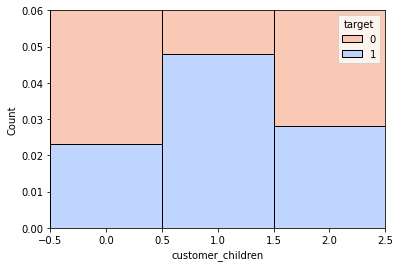

In [98]:
plot = sns.histplot(x='customer_children',data=train1_test,hue='target',palette="coolwarm_r",multiple = "fill")
plot.set(ylim=(0,0.06))

## Create date column

In [31]:
def striptime(x):
    x['customer_since_all'] = pd.to_datetime(x['customer_since_all'])
    x['customer_since_bank'] = pd.to_datetime(x['customer_since_bank'])
    x['customer_birth_date'] = pd.to_datetime(x['customer_birth_date'])
    x['Birth_year'] = x['customer_birth_date'].dt.strftime('%Y').astype(str).astype(int)
    x['Year_since_all'] = x['customer_since_all'].dt.strftime('%Y').astype(str).astype(int)
    x['Year_since_bank'] = x['customer_since_bank'].dt.strftime('%Y').astype(str).astype(int)
    x.drop(['customer_since_all','customer_since_bank','customer_birth_date'], axis=1, inplace=True)

In [32]:
# def drop_col(x):
#     x.drop(['customer_children','customer_relationship','customer_occupation_code',
#             'customer_education',],axis=1, inplace=True) 
#     x.dropna(axis=0, inplace=True) 

In [33]:
for x in df_list:
    x = striptime(x)


## Feature Engineering

In this subsection we create a birth_year (which is utilized to create an age variable), year_since_all & year_since_bank (which are utilized to create a client_since_variable). Additionally, we create variables for the
difference between each feature at T, T-1 and T-2, where categorical variables simply have a yes/no for a
change, and continuous variables have the value by which it has changed. Finally, we remove observations
with data that is inconsistent, this is done by identifying observations where a customer has a child but is
less than 21 years old (since it is extremely unlikely for that to actually be the case). 

### Create Age variables

First, let's extract the customer's Age and drop Birth_year

In [34]:
def client_age(x):
    x['Age'] = x['Birth_year'].apply(lambda x: 2018 -x)
for x in df_list:
    client_age(x)

### Removing outliers based on Birth year/Age

We have noticed some of the clients are born in the 80s. Therefore we will assign a threshhold of 100 years for the client's age.  In addition, the client's birth year cannot greater than the year he started using the banks services.

In [35]:
def remove_out(x):
    x.drop(x[x['Birth_year'] < 1919].index, inplace = True)
    x.drop(x.loc[x['Birth_year'] > (x['Year_since_all'] | x['Year_since_bank'])].index, inplace=True)

Additionally, customers aged 18 years old cannot own mature children or grownups. Hence they will be considered as outliers.

In [36]:
def remove_out2(x):
    x.drop(x.loc[(x['customer_children'] =="preschool") & (x['Age'] <21  )].index, inplace=True)
    x.drop(x.loc[(x['customer_children'] =="young") & (x['Age'] <28  )].index, inplace=True)
    x.drop(x.loc[(x['customer_children'] =="adolescent") & (x['Age'] <32  )].index, inplace=True)
    x.drop(x.loc[(x['customer_children'] =="grownup") & (x['Age'] <36  )].index, inplace=True)
    x.drop(x.loc[(x['customer_children'] =="mature") & (x['Age'] <42 )].index, inplace = True)

In [37]:
for x in df_list:
    remove_out(x)
    remove_out2(x)

### Create client since variable

In [38]:
def client_since(x):
    x['Year_since_all'] = x['Year_since_all'].apply(lambda x: 2018 -x)
    x['Year_since_bank'] = x['Year_since_bank'].apply(lambda x: 2018 -x)
    
for x in df_list:
    client_since(x)

### Create difference variables

In [39]:
#creates a new column in the dataset with a boolean regarding if the values between the 3 columns are the same. 

def change(orig1,orig2,orig3, cols_bool,cols_cont,key ='client_id'):
    columns= [key] + cols_bool + cols_cont
    merged_1 = pd.merge(orig1,orig2[columns], how = 'left',on = key, suffixes=['','-1'])
    merged = pd.merge(merged_1,orig3[columns], how = 'left',on = key, suffixes=['','-2'])
    to_drop =[]
    for var in cols_bool:
        merged['ch_{}'.format(var)] = np.where((merged[var]==merged['{}-1'.format(var)])&(
                                   merged[var] == merged['{}-2'.format(var)]),0,1)
        merged['ch_{}'.format(var)] = pd.Categorical(merged['ch_{}'.format(var)])
        merged[var] = pd.Categorical(merged[var])
        to_drop+=['{}-1'.format(var),'{}-2'.format(var)]
    for var in cols_cont:
        merged['diff_mth1_{}'.format(var)] = -merged[var]+merged['{}-1'.format(var)]
        merged['diff_mth2_{}'.format(var)] = -merged[var]+merged['{}-2'.format(var)]  
        to_drop+=['{}-1'.format(var),'{}-2'.format(var)]
    merged.drop(to_drop,axis=1,inplace=True)
    return merged

In [40]:
# create a new column regarding if there was a change in any var that starts w has_... in the last couple months
# will be 1 if there was any change in the last 2 months 0 otherwise
to_bool = ['homebanking_active', 'has_homebanking',
       'has_insurance_21', 'has_insurance_23', 'has_life_insurance_fixed_cap',
       'has_life_insurance_decreasing_cap', 'has_fire_car_other_insurance',
       'has_personal_loan', 'has_mortgage_loan', 'has_current_account',
       'has_pension_saving', 'has_savings_account',
       'has_savings_account_starter', 'has_current_account_starter']
to_diff_cont = ['bal_insurance_21', 'bal_insurance_23','bal_personal_loan', 
        'bal_mortgage_loan', 'bal_current_account',
        'bal_pension_saving', 'bal_savings_account',
        'bal_savings_account_starter', 'bal_current_account_starter',
        'cap_life_insurance_fixed_cap','cap_life_insurance_decreasing_cap']
train_s = change(train1,train2,train3, to_bool,to_diff_cont)
train_s.columns

Index(['client_id', 'homebanking_active', 'has_homebanking',
       'has_insurance_21', 'has_insurance_23', 'has_life_insurance_fixed_cap',
       'has_life_insurance_decreasing_cap', 'has_fire_car_other_insurance',
       'has_personal_loan', 'has_mortgage_loan', 'has_current_account',
       'has_pension_saving', 'has_savings_account',
       'has_savings_account_starter', 'has_current_account_starter',
       'bal_insurance_21', 'bal_insurance_23', 'cap_life_insurance_fixed_cap',
       'cap_life_insurance_decreasing_cap', 'prem_fire_car_other_insurance',
       'bal_personal_loan', 'bal_mortgage_loan', 'bal_current_account',
       'bal_pension_saving', 'bal_savings_account',
       'bal_savings_account_starter', 'bal_current_account_starter',
       'visits_distinct_so', 'visits_distinct_so_areas', 'customer_gender',
       'customer_postal_code', 'customer_occupation_code',
       'customer_self_employed', 'customer_education', 'customer_children',
       'customer_relationship',

In [41]:
train_s.isna().sum()

client_id                                      0
homebanking_active                             0
has_homebanking                                0
has_insurance_21                               0
has_insurance_23                               0
                                              ..
diff_mth2_bal_current_account_starter          0
diff_mth1_cap_life_insurance_fixed_cap         0
diff_mth2_cap_life_insurance_fixed_cap         0
diff_mth1_cap_life_insurance_decreasing_cap    0
diff_mth2_cap_life_insurance_decreasing_cap    0
Length: 77, dtype: int64

In [42]:
train1['cap_life_insurance_fixed_cap'].unique()

array([     0,   3120,  27730, 100000,   1180,   2480,   1610,   3970,
        63000,  12550,  16960,  40000,   1110,  82350,   2890,  18720,
        49580,  76450,  24790,   2810,  10000,  54540,   1730,    580,
        62000,   3130,  27210,  52330,  12390,    810,  50000,  20700,
         3010,   3500,  16410,  38790,   9300,   2900,  69570,   3720,
       125000,   2030,  12240,  12500, 171050,   1800,    670,  25010,
         5000,   2440,  22400,    250,   1430,  37180,    430,   4310,
        25000,    460,   6200,   7640,  22500,   7080,    530, 140000,
        27160,  11850,    620,  59490,   3360,  56890,   1240,  25510,
       104000,   9000,   9080,  10310,  85430, 127880, 200000,  91100,
        14230,  41980,  30230,     90,   9340,   4960,   2090,  20000,
        71690,  47830,  43380,    960, 150000,    990,  16110,   5040,
       220000,   8250,   3200,  19900,  10860,   3400,  49470,   3620,
         1990,   3060,   1260,   2260,   8750,  14390,   7680,   2450,
      

In [43]:
test_s = change(test1,test2,test3, to_bool, to_diff_cont)

## Feature selection

In this subsection, a stacked absolute value histograms and 100% stacked histograms are plotted
for both the categorical and continuous variables, with a hue indicating the number of people who churned.
Using these graphs we identify variables that clearly have no relationship with the target variable (whether
its by being heavily concentrated on one value/category, or the distribution of churners being very even
across values). This gives us all the continuous variables that we will retain, as well as categorical variables
that we further investigated.
In order to finalize which categorical variables will be used, a pearson chi-square test is carried out at a
1% significance level to see if the target variable is dependent on the variable or not. This leaves us with
twenty categorical variables and nine continuous variables.

### Categorical vars

In [44]:
cat_variables = ['homebanking_active', 'has_homebanking',
       'has_insurance_21', 'has_insurance_23', 'has_life_insurance_fixed_cap',
       'has_life_insurance_decreasing_cap', 'has_fire_car_other_insurance',
       'has_personal_loan', 'has_mortgage_loan', 'has_current_account',
       'has_pension_saving', 'has_savings_account',
       'has_savings_account_starter', 'has_current_account_starter','visits_distinct_so', 'visits_distinct_so_areas', 'customer_gender',
       'customer_self_employed','ch_homebanking_active',
       'ch_has_homebanking', 'ch_has_insurance_21', 'ch_has_insurance_23',
       'ch_has_life_insurance_fixed_cap',
       'ch_has_life_insurance_decreasing_cap',
       'ch_has_fire_car_other_insurance', 'ch_has_personal_loan',
       'ch_has_mortgage_loan', 'ch_has_current_account',
       'ch_has_pension_saving', 'ch_has_savings_account',
       'ch_has_savings_account_starter', 'ch_has_current_account_starter','customer_children']
for var in cat_variables:
    train_s[var] = pd.Categorical(train_s[var]) 
    test_s[var] = pd.Categorical(test_s[var])

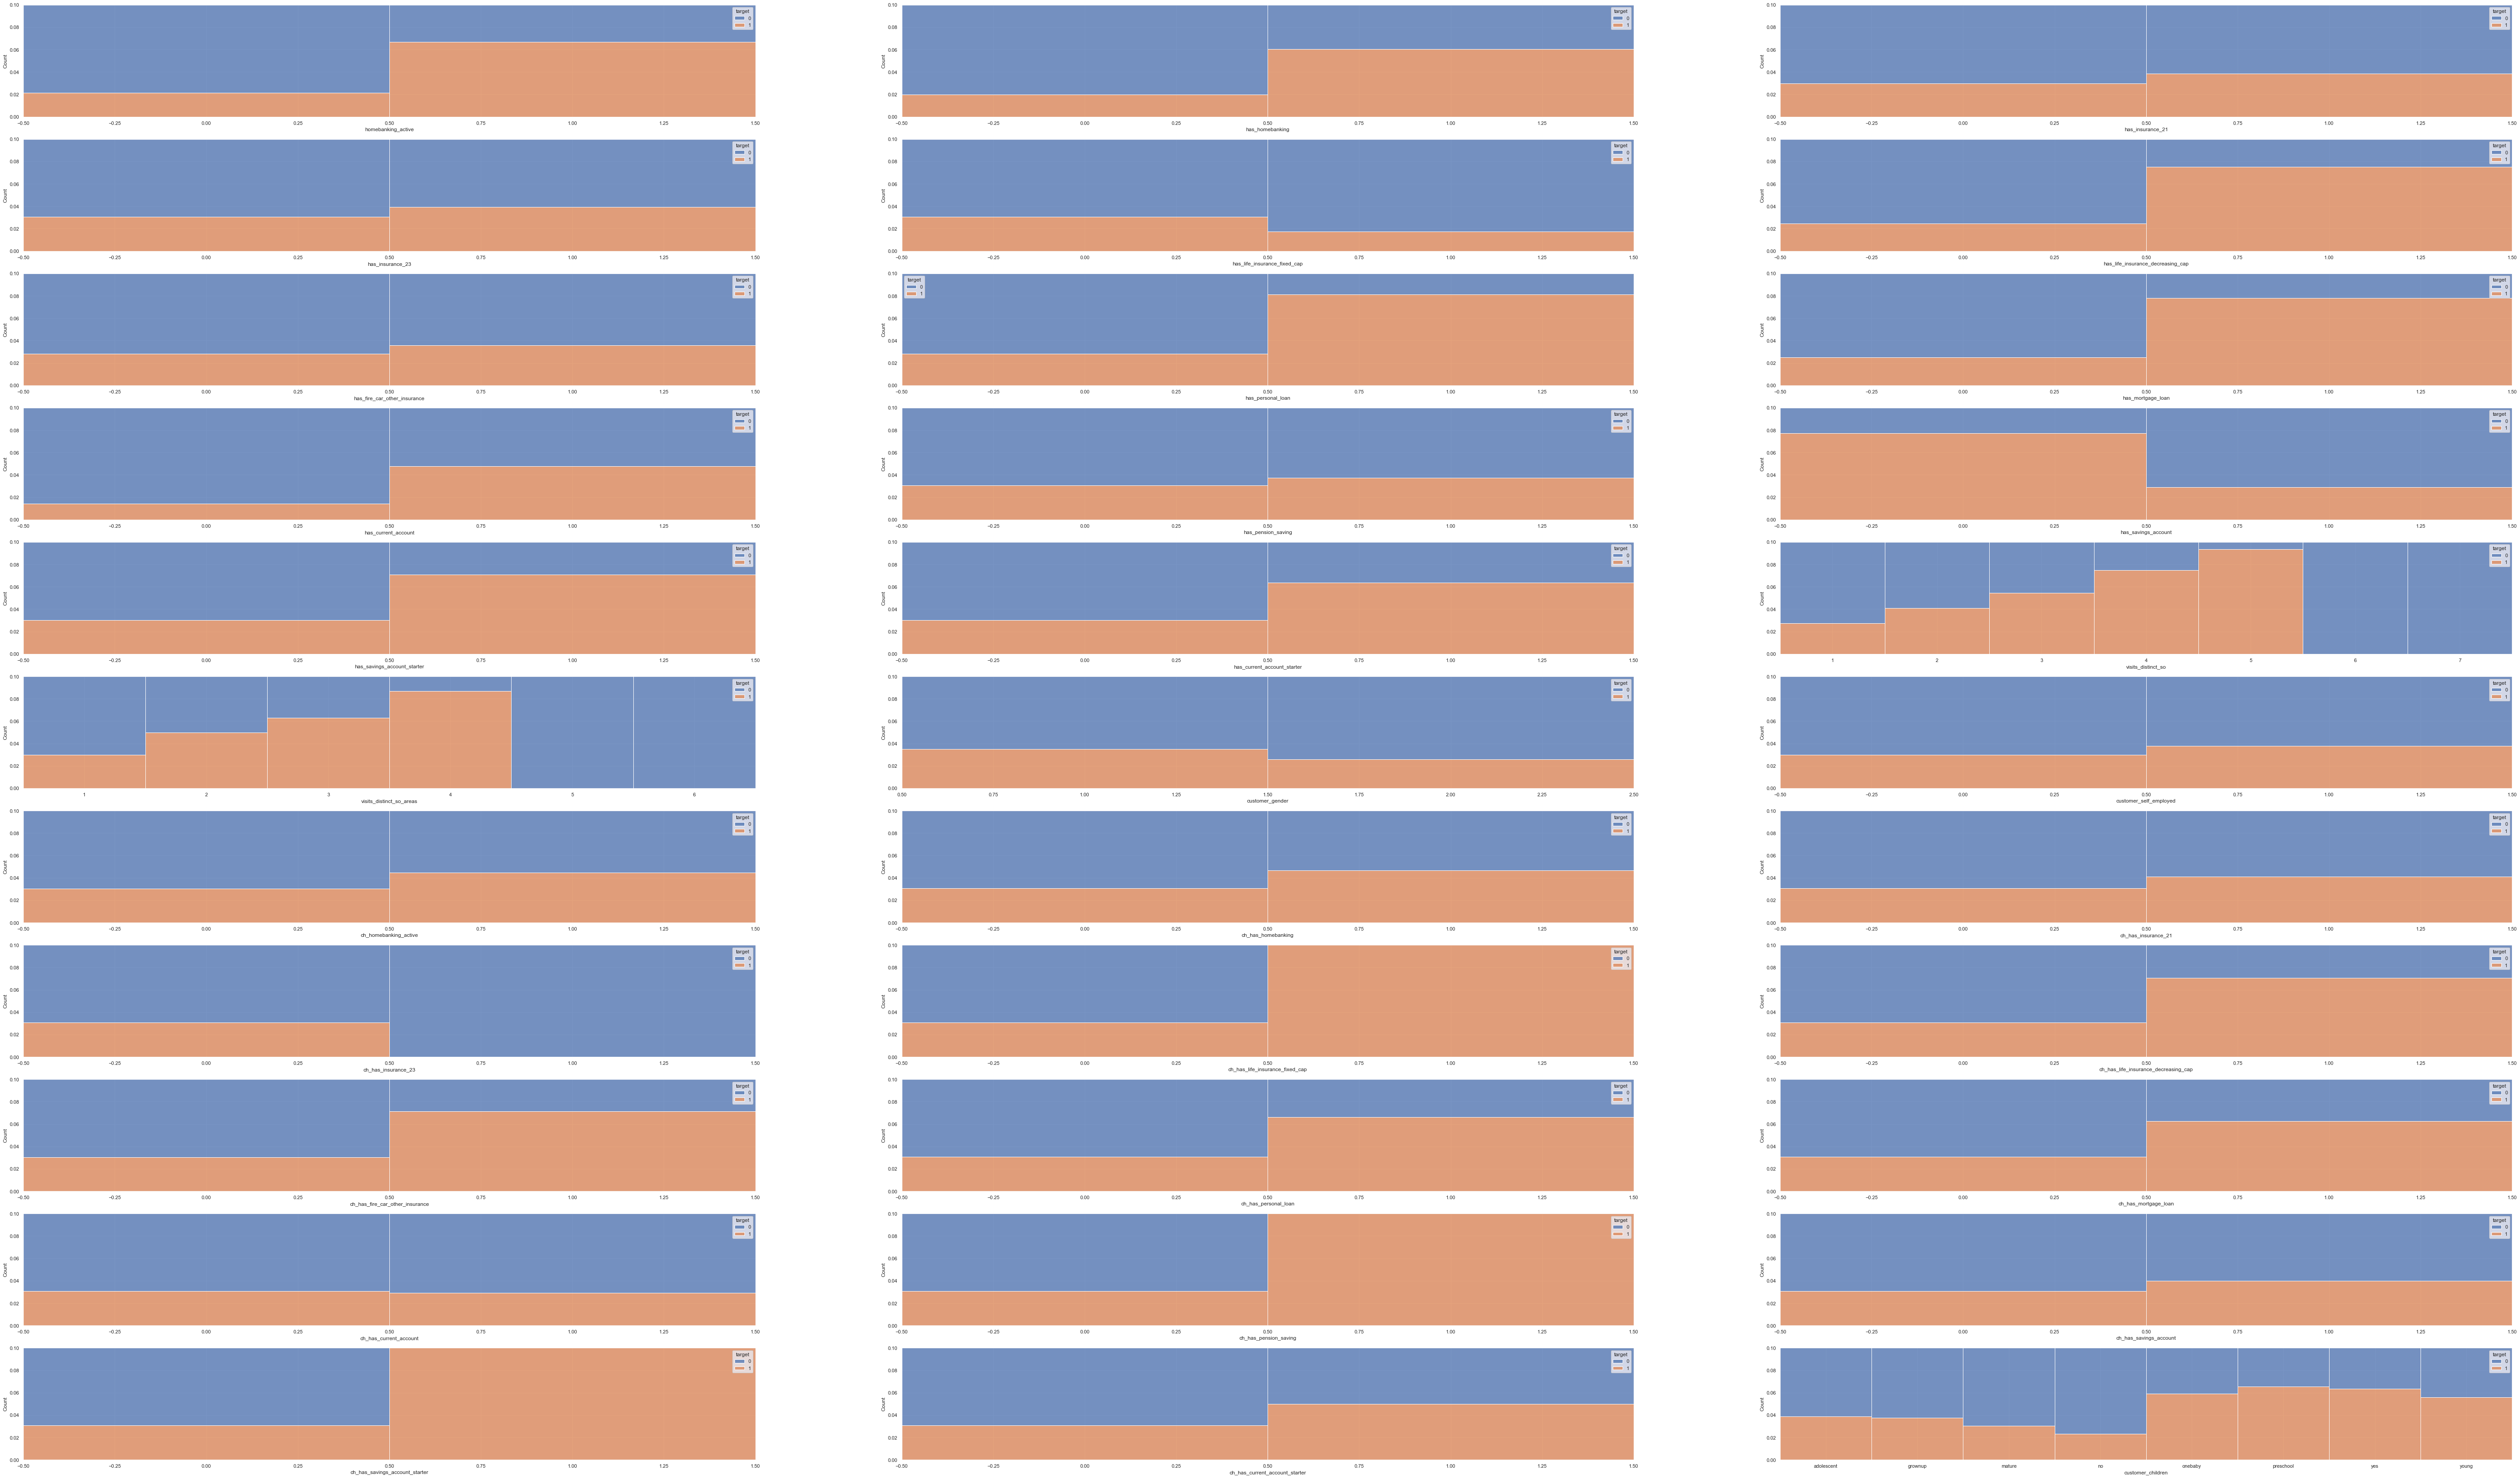

In [101]:
sns.set(rc={'figure.figsize':(5,3)}) 
fig, axes = plt.subplots(11, 3, figsize=(100, 60))

i = 0
j = 0
for variable in cat_variables:
    plot = sns.histplot(ax=axes[i, j],data=train_s, x=variable, hue = "target" , multiple="fill",hue_order = [0,1])
    plot.set(ylim=(0, 0.1))
    j = j + 1
    if (j > 2):
        j = 0
        i = i + 1

In [48]:
vars_to_explore = ['has_insurance_23','has_insurance_21','has_fire_car_other_insurance',
                   'ch_has_insurance_21','ch_has_savings_account','ch_has_current_account',
                   'ch_homebanking_active','has_pension_saving','has_life_insurance_fixed_cap',
                   'customer_postal_code','has_current_account_starter','ch_has_current_account_starter',
                   'has_savings_account_starter','visits_distinct_so_areas','ch_has_life_insurance_decreasing_cap',
                   'ch_has_mortgage_loan','ch_has_savings_account_starter','ch_has_fire_car_other_insurance',
                   'ch_has_insurance_23','visits_distinct_so','ch_has_homebanking','ch_has_personal_loan',
                   'ch_has_pension_saving','ch_has_current_account_starter']

In [49]:
keep_cat = []
for x in cat_variables:
    if x not in vars_to_explore:
        keep_cat += [x]

In [50]:
from scipy.stats import chi2_contingency 
from scipy.stats import chi2

In [51]:
remove_cat = []
for x in vars_to_explore:
    test = pd.crosstab(train_s['target'],train_s[x],margins = False)
    stat, p, dof, expected = chi2_contingency(test)
    critical = chi2.ppf(0.99, dof)
    if abs(stat) >= critical:
        keep_cat = keep_cat + [x]
        print(x + ': Dependent (reject H0)')
    else:
        remove_cat = remove_cat + [x]
        print(x + ': Independent (fail to reject H0)')

has_insurance_23: Independent (fail to reject H0)
has_insurance_21: Dependent (reject H0)
has_fire_car_other_insurance: Dependent (reject H0)
ch_has_insurance_21: Independent (fail to reject H0)
ch_has_savings_account: Independent (fail to reject H0)
ch_has_current_account: Independent (fail to reject H0)
ch_homebanking_active: Independent (fail to reject H0)
has_pension_saving: Independent (fail to reject H0)
has_life_insurance_fixed_cap: Independent (fail to reject H0)
customer_postal_code: Dependent (reject H0)
has_current_account_starter: Dependent (reject H0)
ch_has_current_account_starter: Independent (fail to reject H0)
has_savings_account_starter: Dependent (reject H0)
visits_distinct_so_areas: Dependent (reject H0)
ch_has_life_insurance_decreasing_cap: Dependent (reject H0)
ch_has_mortgage_loan: Independent (fail to reject H0)
ch_has_savings_account_starter: Independent (fail to reject H0)
ch_has_fire_car_other_insurance: Dependent (reject H0)
ch_has_insurance_23: Independent 

In [52]:
print(keep_cat)

['homebanking_active', 'has_homebanking', 'has_life_insurance_decreasing_cap', 'has_personal_loan', 'has_mortgage_loan', 'has_current_account', 'has_savings_account', 'customer_gender', 'customer_self_employed', 'ch_has_life_insurance_fixed_cap', 'customer_children', 'has_insurance_21', 'has_fire_car_other_insurance', 'customer_postal_code', 'has_current_account_starter', 'has_savings_account_starter', 'visits_distinct_so_areas', 'ch_has_life_insurance_decreasing_cap', 'ch_has_fire_car_other_insurance', 'visits_distinct_so']


### Continious vars

In [53]:
cont_vars = ['bal_insurance_21', 'bal_insurance_23','bal_personal_loan', 
'bal_mortgage_loan', 'bal_current_account',
'bal_pension_saving', 'bal_savings_account',
'bal_savings_account_starter', 'bal_current_account_starter',
'cap_life_insurance_fixed_cap','cap_life_insurance_decreasing_cap',
'diff_mth1_bal_insurance_21', 'diff_mth2_bal_insurance_21',
'diff_mth1_bal_insurance_23', 'diff_mth2_bal_insurance_23',
'diff_mth1_bal_personal_loan', 'diff_mth2_bal_personal_loan',
'diff_mth1_bal_mortgage_loan', 'diff_mth2_bal_mortgage_loan',
'diff_mth1_bal_current_account', 'diff_mth2_bal_current_account',
'diff_mth1_bal_pension_saving', 'diff_mth2_bal_pension_saving',
'diff_mth1_bal_savings_account', 'diff_mth2_bal_savings_account',
'diff_mth1_bal_savings_account_starter',
'diff_mth2_bal_savings_account_starter',
'diff_mth1_bal_current_account_starter',
'diff_mth2_bal_current_account_starter',
'diff_mth1_cap_life_insurance_fixed_cap',
'diff_mth2_cap_life_insurance_fixed_cap',
'diff_mth1_cap_life_insurance_decreasing_cap',
'diff_mth2_cap_life_insurance_decreasing_cap','Age','Year_since_all','Year_since_bank']

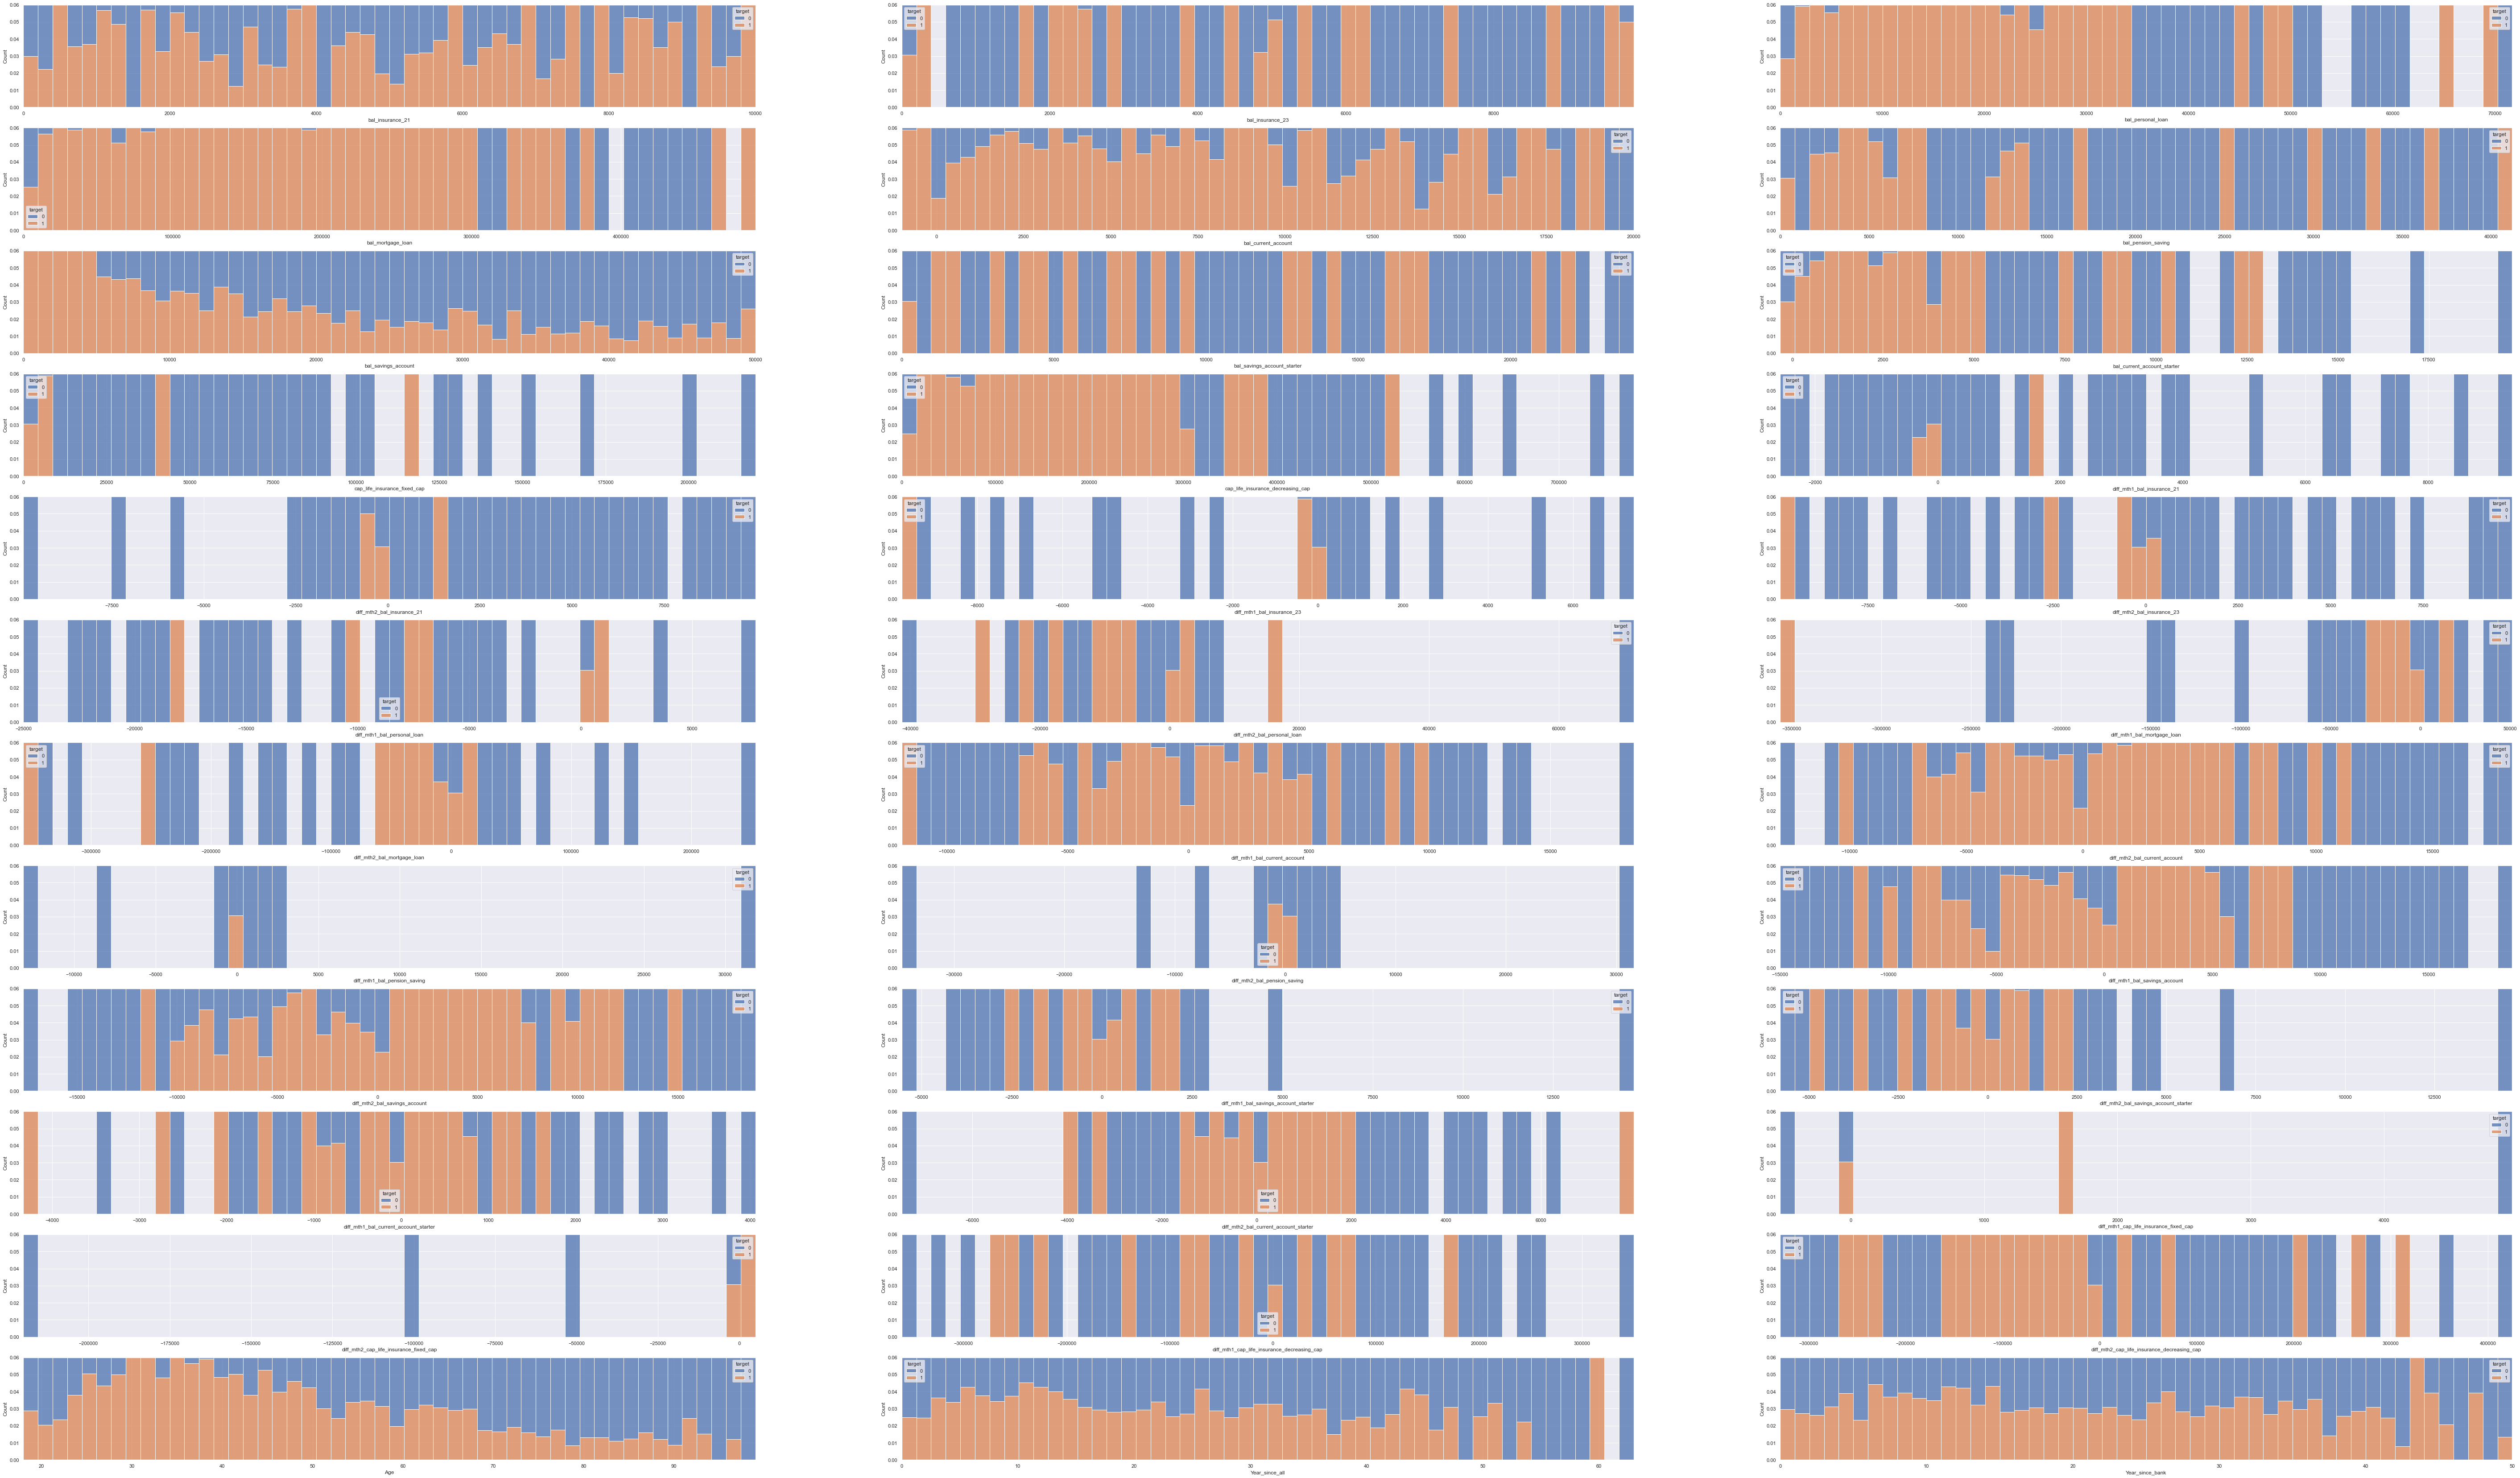

In [105]:
sns.set(rc={'figure.figsize':(5,3)}) 
fig, axes = plt.subplots(12, 3, figsize=(100, 60))

i = 0
j = 0
for variable in cont_vars:
    plot = sns.histplot(ax=axes[i, j],data=train_s, x=variable, hue = "target" , multiple="fill",hue_order = [0,1],
                        bins = 50)
    plot.set(ylim=(0, 0.06))
    j = j + 1
    if (j > 2):
        j = 0
        i = i + 1

In [56]:
keep_cont = ['bal_savings_account','diff_mth2_bal_savings_account','bal_current_account',
             'diff_mth1_bal_current_account','diff_mth1_bal_savings_account','diff_mth2_bal_current_account',
             'Age','Year_since_all','Year_since_bank']

In [57]:
final_vars = keep_cat + keep_cont
len(final_vars)

29

In [58]:
keep_cat

['homebanking_active',
 'has_homebanking',
 'has_life_insurance_decreasing_cap',
 'has_personal_loan',
 'has_mortgage_loan',
 'has_current_account',
 'has_savings_account',
 'customer_gender',
 'customer_self_employed',
 'ch_has_life_insurance_fixed_cap',
 'customer_children',
 'has_insurance_21',
 'has_fire_car_other_insurance',
 'customer_postal_code',
 'has_current_account_starter',
 'has_savings_account_starter',
 'visits_distinct_so_areas',
 'ch_has_life_insurance_decreasing_cap',
 'ch_has_fire_car_other_insurance',
 'visits_distinct_so']

In [110]:
train_final = train_s[['target']+final_vars]

In [111]:
test_final = test_s[['client_id'] + final_vars]

## Final training set missing data

In [112]:
missing_df = train_final.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['%']=(missing_df['missing values'])/train_final.shape[0]*100
missing_df = missing_df[missing_df['missing values'] >0].sort_values('%')
missing_df

,variable,missing values,%
11,customer_children,22147,37.89634


In [113]:
missing_df = test_final.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['%']=(missing_df['missing values'])/test_final.shape[0]*100
missing_df = missing_df[missing_df['missing values'] >0].sort_values('%')
missing_df

,variable,missing values,%
11,customer_children,9553,38.193667


In [114]:
rep = {'onebaby':'yes','preschool':'yes', 'young':'yes','adolescent':'yes','grownup':'yes','mature':'yes',
      np.nan:'missing','nan':'yes'}
train_final['customer_children'] = train_final['customer_children'].astype(str).replace(rep)
test_final['customer_children'] = test_final['customer_children'].astype(str).replace(rep)


In [115]:
missing_df = test_final.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['%']=(missing_df['missing values'])/test_final.shape[0]*100
missing_df = missing_df[missing_df['missing values'] >0].sort_values('%')
missing_df

,variable,missing values,%


In [66]:
print("From the initial data set, we lost " + str(round((copy_df['target'].sum()-train_final['target'].sum())/copy_df['target'].sum() *100)) +"%" + " churners after cleaning the data set. We will move on to the modeling step.")

From the initial data set, we lost 6% churners after cleaning the data set. We will move on to the modeling step.


## Prepare training Data

In [75]:
train_final.columns

Index(['target', 'homebanking_active', 'has_homebanking',
       'has_life_insurance_decreasing_cap', 'has_personal_loan',
       'has_mortgage_loan', 'has_current_account', 'has_savings_account',
       'customer_gender', 'customer_self_employed',
       'ch_has_life_insurance_fixed_cap', 'customer_children',
       'has_insurance_21', 'has_fire_car_other_insurance',
       'customer_postal_code', 'has_current_account_starter',
       'has_savings_account_starter', 'visits_distinct_so_areas',
       'ch_has_life_insurance_decreasing_cap',
       'ch_has_fire_car_other_insurance', 'visits_distinct_so',
       'bal_savings_account', 'diff_mth2_bal_savings_account',
       'bal_current_account', 'diff_mth1_bal_current_account',
       'diff_mth1_bal_savings_account', 'diff_mth2_bal_current_account', 'Age',
       'Year_since_all', 'Year_since_bank'],
      dtype='object')

In [76]:
train_final.shape

(58441, 30)

In [77]:
# create matrix with interation terms
y = train_final.iloc[:,0]
X = pd.get_dummies(train_final.iloc[:,1:],drop_first=True)

In [80]:
X.shape

(58441, 38)

## Prepare testing Data

In [81]:
leaderboard_test = pd.get_dummies(test_final.iloc[:,1:],drop_first=True)

In [82]:
leaderboard_test.shape

(25012, 36)

In [84]:
# We are missing to columns from test data because the category number is not listed in the column feature. We will set them manually to 0
for x in X.columns:
    if x in leaderboard_test.columns:
        continue
    else:
        leaderboard_test[x]=0


In [85]:
leaderboard_test

,customer_postal_code,bal_savings_account,diff_mth2_bal_savings_account,bal_current_account,diff_mth1_bal_current_account,diff_mth1_bal_savings_account,diff_mth2_bal_current_account,Age,Year_since_all,Year_since_bank,...,visits_distinct_so_areas_5.0,ch_has_life_insurance_decreasing_cap_1,ch_has_fire_car_other_insurance_1,visits_distinct_so_2.0,visits_distinct_so_3.0,visits_distinct_so_4.0,visits_distinct_so_5.0,visits_distinct_so_6.0,visits_distinct_so_areas_6.0,visits_distinct_so_7.0
0,9860,5190,1260,1590,-330,0,-790,81,37,37,...,0,0,0,0,0,0,0,0,0,0
1,2491,15010,0,0,30,0,30,77,25,25,...,0,0,0,0,0,0,0,0,0,0
2,1770,3700,0,4200,-910,0,-900,49,25,13,...,0,0,0,0,0,0,0,0,0,0
3,7750,27500,0,3960,-440,0,-920,66,40,9,...,0,0,0,0,0,0,0,0,0,0
4,2270,10190,0,0,0,0,0,56,4,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25007,9700,18150,-90,0,0,-90,0,72,29,29,...,0,0,0,0,0,0,0,0,0,0
25008,2480,470,0,5670,200,0,-140,83,19,13,...,0,0,0,1,0,0,0,0,0,0
25009,7034,20120,0,0,0,0,0,68,13,1,...,0,0,0,0,0,0,0,0,0,0
25010,9880,19780,0,1760,-350,0,-420,58,15,15,...,0,0,0,0,0,0,0,0,0,0


# Model Creation

## Functions

In [ ]:
from utils import *

## Fitting vanilla models 

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10,stratify=y, shuffle=True)

In [155]:
# Classifiers to use
models = []
models.append(['KNeighbors',KNeighborsClassifier(n_jobs=4,algorithm='brute',n_neighbors=10)])
models.append(['RandomForest',RandomForestClassifier(random_state=10)])
models.append(['AdaBoostClassifier',AdaBoostClassifier(random_state=10)])
models.append(['LogisticsRegression', LogisticRegression(solver = 'saga', random_state=10)])
models.append(['GradientBoost',GradientBoostingClassifier(random_state=10)])
models.append(['XGBClassifier',xgb.XGBClassifier(eval_metric='logloss', random_state=10, n_jobs =4,use_label_encoder=False)])
models.append(['SGDClassifier', SGDClassifier(loss='log',random_state=10)])
models.append(['BalancedRandomForestClassifier',BalancedRandomForestClassifier(n_jobs=4, random_state=10)])
models.append(['BalancedBaggingClassifier',BalancedBaggingClassifier(random_state=42)])
models.append(['RUSBoostClassifier',RUSBoostClassifier(random_state=42)])

We first fit the models without adding or changing any parameters with and without cross-validation.\
Our future goal is to improve the model for correctly predicting true positives. Hence, we are interested in the precision score of our models. \

In [156]:
modeling(models)

KNeighbors :
[[11331     0]
 [  358     0]]
AUC: 0.554
5-CV AUC: 0.579
5-CV AUC Standard Deviation: 0.016
RandomForest :
[[11331     0]
 [  358     0]]
AUC: 0.684
5-CV AUC: 0.720
5-CV AUC Standard Deviation: 0.018
AdaBoostClassifier :
[[11330     1]
 [  358     0]]
AUC: 0.728
5-CV AUC: 0.741
5-CV AUC Standard Deviation: 0.010
LogisticsRegression :
[[11331     0]
 [  358     0]]
AUC: 0.611
5-CV AUC: 0.626
5-CV AUC Standard Deviation: 0.015
GradientBoost :
[[11326     5]
 [  358     0]]
AUC: 0.738
5-CV AUC: 0.753
5-CV AUC Standard Deviation: 0.009
XGBClassifier :
[[11319    12]
 [  357     1]]
AUC: 0.681
5-CV AUC: 0.702
5-CV AUC Standard Deviation: 0.019
SGDClassifier :
[[11331     0]
 [  358     0]]
AUC: 0.500
5-CV AUC: 0.596
5-CV AUC Standard Deviation: 0.038
BalancedRandomForestClassifier :
[[7804 3527]
 [ 117  241]]
AUC: 0.735
5-CV AUC: 0.751
5-CV AUC Standard Deviation: 0.011
BalancedBaggingClassifier :
[[9222 2109]
 [ 200  158]]
AUC: 0.692
5-CV AUC: 0.714
5-CV AUC Standard Deviatio

,Model,AUC,5-CV AUC,5-CV AUC std,F1,Accuracy,Recall,Precision
4,GradientBoost,0.738299,0.752582,0.009421,0.000000,0.968945,0.000000,0.000000
7,BalancedRandomForestClassifier,0.735114,0.750774,0.010871,0.116820,0.688254,0.673184,0.063960
9,RUSBoostClassifier,0.729123,0.726983,0.008997,0.114083,0.722303,0.583799,0.063218
2,AdaBoostClassifier,0.727813,0.741177,0.009901,0.000000,0.969287,0.000000,0.000000
8,BalancedBaggingClassifier,0.692260,0.713592,0.016033,0.120381,0.802464,0.441341,0.069696
1,RandomForest,0.683720,0.719743,0.017913,0.000000,0.969373,0.000000,0.000000
5,XGBClassifier,0.681161,0.701841,0.019092,0.005391,0.968432,0.002793,0.076923
3,LogisticsRegression,0.610545,0.626019,0.015280,0.000000,0.969373,0.000000,0.000000
0,KNeighbors,0.553787,0.579136,0.015738,0.000000,0.969373,0.000000,0.000000
6,SGDClassifier,0.500000,0.595704,0.037707,0.000000,0.969373,0.000000,0.000000


The confusion matrices printed above show how bad the model is performing for catching True positives. In addition, the high AUC score and the low AUC cross-validation score shows that the models are overfitting.This is due to having an imbalanced target variable. \
The classifiers used from imblearn library uses an under sampling technique for rebalancing the classes in the training data. Hence why they outrank most of the classifiers in precision.\
On the other hand, XGBClassifier scored the best in precision without adding any class weights or resampling the data.

Therefore, we will try the following techniques to improve the models:

- Adding misclassification costs
- Over/Under sampling churned targets



# Model improvement for imbalanced data sets

## Adding class weights

In [141]:
classes_weights = class_weight.compute_sample_weight(
    class_weight='balanced',
    y=y_train
)

In [142]:
pd.DataFrame(classes_weights).value_counts()

0.515822     45318
16.301255     1434
dtype: int64

In [158]:
#For XGBClassifier, the class weight is added when calling the classifier
# Scale_pos_weight= 45318/1434 =32
models = []
models.append(['XGBClassifier',xgb.XGBClassifier(eval_metric='logloss', random_state=10, n_jobs =4,use_label_encoder=False,scale_pos_weight=32)])
models.append(['RandomForest',RandomForestClassifier(random_state=10,class_weight = 'balanced')])
models.append(['LogisticsRegression', LogisticRegression(solver = 'saga',random_state=10,class_weight = 'balanced')])
models.append(['SGDClassifier', SGDClassifier(loss='log',random_state=10,class_weight = 'balanced')])

In [159]:
modeling(models)

XGBClassifier :
[[10347   984]
 [  282    76]]
AUC: 0.615
5-CV AUC: 0.633
5-CV AUC Standard Deviation: 0.013
RandomForest :
[[11331     0]
 [  358     0]]
AUC: 0.681
5-CV AUC: 0.712
5-CV AUC Standard Deviation: 0.008
LogisticsRegression :
[[8750 2581]
 [ 196  162]]
AUC: 0.653
5-CV AUC: 0.666
5-CV AUC Standard Deviation: 0.012
SGDClassifier :
[[7901 3430]
 [ 181  177]]
AUC: 0.596
5-CV AUC: 0.573
5-CV AUC Standard Deviation: 0.094


,Model,AUC,5-CV AUC,5-CV AUC std,F1,Accuracy,Recall,Precision
1,RandomForest,0.681175,0.711702,0.008289,0.000000,0.969373,0.000000,0.000000
2,LogisticsRegression,0.652866,0.665930,0.011796,0.104482,0.762426,0.452514,0.059059
0,XGBClassifier,0.615341,0.632660,0.013333,0.107193,0.891693,0.212291,0.071698
3,SGDClassifier,0.595830,0.573205,0.094385,0.089281,0.691077,0.494413,0.049071


In [160]:
# As for these models, class weights is called in the .fit() method
parameters = {'sample_weight':classes_weights}
models=[]

models.append(['AdaBoostClassifier',AdaBoostClassifier(random_state=10)])
models.append(['GradientBoost',GradientBoostingClassifier(random_state=10)])

In [161]:
modeling4(models)

AdaBoostClassifier :
[[8114 3217]
 [ 141  217]]
AUC: 0.730
5-CV AUC: 0.741
5-CV AUC Standard Deviation: 0.010
GradientBoost :
[[8315 3016]
 [ 137  221]]
AUC: 0.732
5-CV AUC: 0.753
5-CV AUC Standard Deviation: 0.009


,Model,AUC,5-CV AUC,5-CV AUC std,F1,Accuracy,Recall,Precision
1,GradientBoost,0.731903,0.752582,0.009421,0.122949,0.730259,0.617318,0.068273
0,AdaBoostClassifier,0.730364,0.741177,0.009901,0.114451,0.712721,0.606145,0.063192


XGBoost outranks all classifiers again. Given it's low computation time and high ranking, we will proceed with the latter.

## Over Sampling 

In [169]:
# Classifiers to use
clf = xgb.XGBClassifier(eval_metric='logloss', random_state=10, n_jobs =4,use_label_encoder=False)

In [209]:
for x in [0.1,0.15,0.2,0.5,0.7,1]:
    accuracy = []
    f1 = []
    auc = []
    recall = []
    precision = []
    auc_cv = []
    print('Sampling strategy: ' + str(x))
    sm = SMOTENC(categorical_features=cat_col_index, random_state=4, sampling_strategy=x)
    X_train_OS, y_train_OS = nm.fit_resample(X_train, y_train)
    start = time.time()
    clf.fit(X_train_OS,y_train_OS)
    
    y_pred = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)[:,1]
    
   
    f1.append(f1_score(y_test, y_pred))
    accuracy.append(accuracy_score(y_test, y_pred))
    auc.append(roc_auc_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred))
    auc_cv.append((cross_val_score(estimator= clf, X = X_train_OS,y = y_train_OS, cv=5,scoring = 'roc_auc')).mean())
    results = pd.DataFrame([auc,auc_cv, accuracy, precision,recall,f1],
                      index= ['AUC','5-CV AUC','Accuracy','Precision','Recall','F1'],
                           columns=['XGBClassifier'])
    #Change orientation of the dataframe
    print(results.transpose()) 
    cm = confusion_matrix(y_test,y_pred)
    
    print(cm) 

    end = time.time()
    print('===================== ' + str(round((end-start),2))+ 'seconds  =======================')

Sampling strategy: 0.1
                    AUC  5-CV AUC  Accuracy  Precision    Recall       F1
XGBClassifier  0.648667  0.713693  0.664984   0.056359  0.631285  0.10348
[[7547 3784]
 [ 132  226]]
===================== 1.43seconds  =======================
Sampling strategy: 0.15
                    AUC  5-CV AUC  Accuracy  Precision    Recall       F1
XGBClassifier  0.648667  0.713693  0.664984   0.056359  0.631285  0.10348
[[7547 3784]
 [ 132  226]]
===================== 1.41seconds  =======================
Sampling strategy: 0.2
                    AUC  5-CV AUC  Accuracy  Precision    Recall       F1
XGBClassifier  0.648667  0.713693  0.664984   0.056359  0.631285  0.10348
[[7547 3784]
 [ 132  226]]
===================== 1.5seconds  =======================
Sampling strategy: 0.5
                    AUC  5-CV AUC  Accuracy  Precision    Recall       F1
XGBClassifier  0.648667  0.713693  0.664984   0.056359  0.631285  0.10348
[[7547 3784]
 [ 132  226]]
===================== 1.4second

## Undersampling 

### Near Miss

In [186]:
nm = NearMiss(version=1, n_neighbors=3,sampling_strategy=0.1)
X_train_US, y_train_US = nm.fit_resample(X_train, y_train)

In [210]:
for x in [0.1,0.15,0.2,0.5,0.7,1]:
    accuracy = []
    f1 = []
    auc = []
    recall = []
    precision = []
    auc_cv = []
    print('Sampling strategy: ' + str(x))
    nm = NearMiss(version=3, n_neighbors=1,sampling_strategy=x)
    X_train_US, y_train_US = nm.fit_resample(X_train, y_train)
    start = time.time()
    clf.fit(X_train_US,y_train_US)
    
    y_pred = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)[:,1]
    
   
    f1.append(f1_score(y_test, y_pred))
    accuracy.append(accuracy_score(y_test, y_pred))
    auc.append(roc_auc_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred))
    auc_cv.append((cross_val_score(estimator= clf, X = X_train_US,y = y_train_US, cv=5,scoring = 'roc_auc')).mean())
    results = pd.DataFrame([auc,auc_cv, accuracy, precision,recall,f1],
                      index= ['AUC','5-CV AUC','Accuracy','Precision','Recall','F1'],
                           columns=['XGBClassifier'])
    #Change orientation of the dataframe
    print(results.transpose()) 
    cm = confusion_matrix(y_test,y_pred)
    
    print(cm) 

    end = time.time()
    print('===================== ' + str(round((end-start),2))+ 'seconds  =======================')

Sampling strategy: 0.1
                    AUC  5-CV AUC  Accuracy  Precision    Recall        F1
XGBClassifier  0.534295  0.375907   0.90213   0.057432  0.142458  0.081862
[[10494   837]
 [  307    51]]
===================== 2.18seconds  =======================
Sampling strategy: 0.15
                    AUC  5-CV AUC  Accuracy  Precision    Recall        F1
XGBClassifier  0.534295  0.375907   0.90213   0.057432  0.142458  0.081862
[[10494   837]
 [  307    51]]
===================== 2.05seconds  =======================
Sampling strategy: 0.2
                    AUC  5-CV AUC  Accuracy  Precision    Recall        F1
XGBClassifier  0.534295  0.375907   0.90213   0.057432  0.142458  0.081862
[[10494   837]
 [  307    51]]
===================== 2.16seconds  =======================
Sampling strategy: 0.5
                    AUC  5-CV AUC  Accuracy  Precision    Recall        F1
XGBClassifier  0.397408  0.531175  0.447943   0.019398  0.343575  0.036722
[[5113 6218]
 [ 235  123]]
==========

Sampling strategy -> 0.5

### Random Under Sampler

In [211]:
for x in [0.1,0.15,0.2,0.5,0.7,1]:
    accuracy = []
    f1 = []
    auc = []
    recall = []
    precision = []
    auc_cv = []
    print('Sampling strategy: ' + str(x))
    nm = RandomUnderSampler(random_state=4, sampling_strategy=x)
    X_train_US, y_train_US = nm.fit_resample(X_train, y_train)
    start = time.time()
    clf.fit(X_train_US,y_train_US)
    
    y_pred = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)[:,1]
    
   
    f1.append(f1_score(y_test, y_pred))
    accuracy.append(accuracy_score(y_test, y_pred))
    auc.append(roc_auc_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred))
    auc_cv.append((cross_val_score(estimator= clf, X = X_train_US,y = y_train_US, cv=5,scoring = 'roc_auc')).mean())
    results = pd.DataFrame([auc,auc_cv, accuracy, precision,recall,f1],
                      index= ['AUC','5-CV AUC','Accuracy','Precision','Recall','F1'],
                           columns=['XGBClassifier'])
    #Change orientation of the dataframe
    print(results.transpose()) 
    cm = confusion_matrix(y_test,y_pred)
    
    print(cm) 

    end = time.time()
    print('===================== ' + str(round((end-start),2))+ 'seconds  =======================')

Sampling strategy: 0.1
                    AUC  5-CV AUC  Accuracy  Precision    Recall        F1
XGBClassifier  0.518697  0.701316  0.958422   0.109756  0.050279  0.068966
[[11185   146]
 [  340    18]]
===================== 5.46seconds  =======================
Sampling strategy: 0.15
                    AUC  5-CV AUC  Accuracy  Precision    Recall   F1
XGBClassifier  0.535336  0.706625  0.946103   0.102339  0.097765  0.1
[[11024   307]
 [  323    35]]
===================== 3.59seconds  =======================
Sampling strategy: 0.2
                    AUC  5-CV AUC  Accuracy  Precision    Recall        F1
XGBClassifier  0.541887  0.706324  0.924716    0.07767  0.134078  0.098361
[[10761   570]
 [  310    48]]
===================== 2.95seconds  =======================
Sampling strategy: 0.5
                    AUC  5-CV AUC  Accuracy  Precision    Recall        F1
XGBClassifier  0.638138   0.71757  0.820258   0.077147  0.444134  0.131459
[[9429 1902]
 [ 199  159]]
====================

Best sampling strategy: 0.1

## Summary

The sampling strategy parameter defines the desired ratio of the number of samples in the minority class over the number of samples in the majority class after resampling.\
The best precision score achieved was 10% using the random under sampler with a 10% ratio.\
The final stage is to tune the model's hyperparameters.

In [212]:
nm = RandomUnderSampler(random_state=4, sampling_strategy=0.1)
X_train_US, y_train_US = nm.fit_resample(X_train, y_train)

# Tuning

## PCA n-components

In [238]:
pipelines = Pipeline(steps=[('pca', PCA()),
 ('clf', XGBClassifier(eval_metric='logloss', n_jobs =4,use_label_encoder=False,random_state=10))])

In [ ]:
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

In [239]:
grid_values = { 
                 'pca__n_components':list(range(1,20)),
            
}

grid_clf_acc = GridSearchCV(pipelines, grid_values, scoring="precision", n_jobs=-1)
grid_clf_acc.fit(X_train_US, y_train_US)
y_pred_acc = grid_clf_acc.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_acc).ravel()
recall =  tp/(tp + fn) 
specificity = tn/(tn+fp) 
precision = tp/(tp+fp) 
accuracy = (tp + tn)/(tp + tn + fp + fn)
print(precision,accuracy,recall)
print('\n Best hyperparameters:')
print(grid_clf_acc.best_params_)

0.11180124223602485 0.958679100008555 0.05027932960893855

 Best hyperparameters:
{'pca__n_components': 19}


In [245]:
pipelines = Pipeline(steps=[('pca', PCA(n_components=19)),
 ('clf', XGBClassifier(eval_metric='logloss', n_jobs =4,use_label_encoder=False,random_state=10))])
#pipelines.fit(X_train_US, y_train_US)

## Classifier Hyperparameters Tuning

In [250]:
pipelines = Pipeline(steps=[('pca', PCA(n_components=19)),
                             ('clf', XGBClassifier(eval_metric='logloss', n_jobs =4,use_label_encoder=False,random_state=10))])

In [256]:
grid_values = { 
                 'pca__n_components':list(range(7,20))
                 'clf__learning_rate':[0.001,0.01,0.05],
                 'clf__max_depth': [3,4,5,6,7,8,9,10],
                 'clf__min_child_weight':[2, 3, 5, 10, 25]
}

In [257]:
grid_clf_acc = GridSearchCV(pipelines, grid_values, scoring="precision", n_jobs=-1)
grid_clf_acc.fit(X_train_US, y_train_US)
y_pred_acc = grid_clf_acc.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_acc).ravel()
recall =  tp/(tp + fn) 
specificity = tn/(tn+fp) 
precision = tp/(tp+fp) 
accuracy = (tp + tn)/(tp + tn + fp + fn)
print(precision,accuracy,recall)
print('\n Best hyperparameters:')
print(grid_clf_acc.best_params_)

0.14285714285714285 0.9689451621182308 0.002793296089385475

 Best hyperparameters:
{'clf__learning_rate': 0.05, 'clf__max_depth': 7, 'clf__min_child_weight': 25}


Extra tuning:

Setting it to x means that XGBoost would randomly sample x of the training data prior to growing trees and this will prevent overfitting

In [269]:
final = Pipeline(steps=[('pca', PCA(n_components=19)),
                             ('clf', XGBClassifier(eval_metric='logloss',
                              learning_rate= 0.05,max_depth=7,min_child_weight= 25, n_jobs =4,use_label_encoder=False,random_state=10))])
grid_values = { 
                 
                 'clf__subsample':[0.3,0.4,0.5,0.6,0.7,0.8,1]
}

In [270]:
grid_clf_acc = GridSearchCV(pipelines, grid_values, scoring="precision", n_jobs=-1)
grid_clf_acc.fit(X_train_US, y_train_US)
y_pred_acc = grid_clf_acc.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_acc).ravel()
recall =  tp/(tp + fn) 
specificity = tn/(tn+fp) 
precision = tp/(tp+fp) 
accuracy = (tp + tn)/(tp + tn + fp + fn)
print(precision,accuracy,recall)
print('\n Best hyperparameters:')
print(grid_clf_acc.best_params_)

0.2 0.969116263153392 0.002793296089385475

 Best hyperparameters:
{'clf__subsample': 0.6}


## Final Model 

In [315]:
pipelines = Pipeline(steps=[('pca', PCA(n_components=19)),
                             ('clf', XGBClassifier(eval_metric='logloss',
                              learning_rate= 0.05,max_depth=7,subsample=0.6 , min_child_weight= 25, n_jobs =4,use_label_encoder=False,random_state=10))])

In [316]:
pipelines.fit(X_train_US,y_train_US)

Pipeline(steps=[('pca', PCA(n_components=19)),
                ('clf',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               eval_metric='logloss', gamma=0, gpu_id=-1,
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.05, max_delta_step=0,
                               max_depth=7, min_child_weight=25, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=4, num_parallel_tree=1, predictor='auto',
                               random_state=10, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=0.5,
                               tree_method='exact', use_label_encoder=False,
                               validate

In [318]:
y_prob = pipelines.predict_proba(leaderboard_test)[:,1]

In [320]:
probas_test = pd.DataFrame(y_prob, columns=['PROB'])

In [323]:
leaderboard =pd.DataFrame()
leaderboard['client_id'] = test_final['client_id']
leaderboard['PROB'] = probas_test['PROB']

In [324]:
copy_df2.iloc[:,0]

0        ccf4cd93d5c32cd8a59809d54b4d53ac
1        56605a660d18549592653ff6941186f1
2        bda5f84c05e5695a7ec10550b457890f
3        a2f1c04bc3acf2222e658a897400798f
4        e83aadc3b0d25dbc12a35551afa25807
                       ...               
27295    1a634b5cfe6dbf35e77ce6519c0e3939
27296    84b7af2ddbeb919ab238ef7e6a83936c
27297    c257c09e3f4445d67b52a1007b0205df
27298    fdd7a1b7e58f642a1fc4867b8f7cdf3a
27299    9b088b828fa94419c00175b6536857f9
Name: client_id, Length: 27300, dtype: object

In [325]:
mergetest = leaderboard.merge(copy_df2.iloc[:,0], on='client_id',how='right')

In [326]:
mergetest.fillna(0)

,client_id,PROB
0,ccf4cd93d5c32cd8a59809d54b4d53ac,0.202497
1,56605a660d18549592653ff6941186f1,0.039963
2,bda5f84c05e5695a7ec10550b457890f,0.222185
3,a2f1c04bc3acf2222e658a897400798f,0.055010
4,e83aadc3b0d25dbc12a35551afa25807,0.061264
...,...,...
27295,1a634b5cfe6dbf35e77ce6519c0e3939,0.073175
27296,84b7af2ddbeb919ab238ef7e6a83936c,0.000000
27297,c257c09e3f4445d67b52a1007b0205df,0.044495
27298,fdd7a1b7e58f642a1fc4867b8f7cdf3a,0.070406


In [327]:
mergetest.rename(columns={'client_id':'ID'},inplace=True)

Final leaderboard score: 34 TP and AUC = 0.72288713 -> model was among the top 5 best performing models.